<a href="https://colab.research.google.com/github/abdulwaheedTMU/Project3/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA

In [1]:
# Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

# Install required packages (if not already installed)
!pip install ultralytics opencv-python pillow torch torchvision


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 24.0 MB/s eta 0:00:00


Step 1

Step 1: Original image loaded successfully.
Step 2: Image converted to grayscale and blurred.
Grayscale image saved as: grayscale_image_20241213_022714.jpeg
Step 3: Threshold applied to separate PCB from background.
Thresholded image saved as: thresholded_image_20241213_022714.jpeg
Step 4: 4536 contours found. Selecting the largest one.
Step 5: Mask created based on the largest contour.
Mask image saved as: mask_image_20241213_022714.jpeg
Step 6: PCB extracted using the mask.
Extracted image saved as: extracted_image_20241213_022715.jpeg


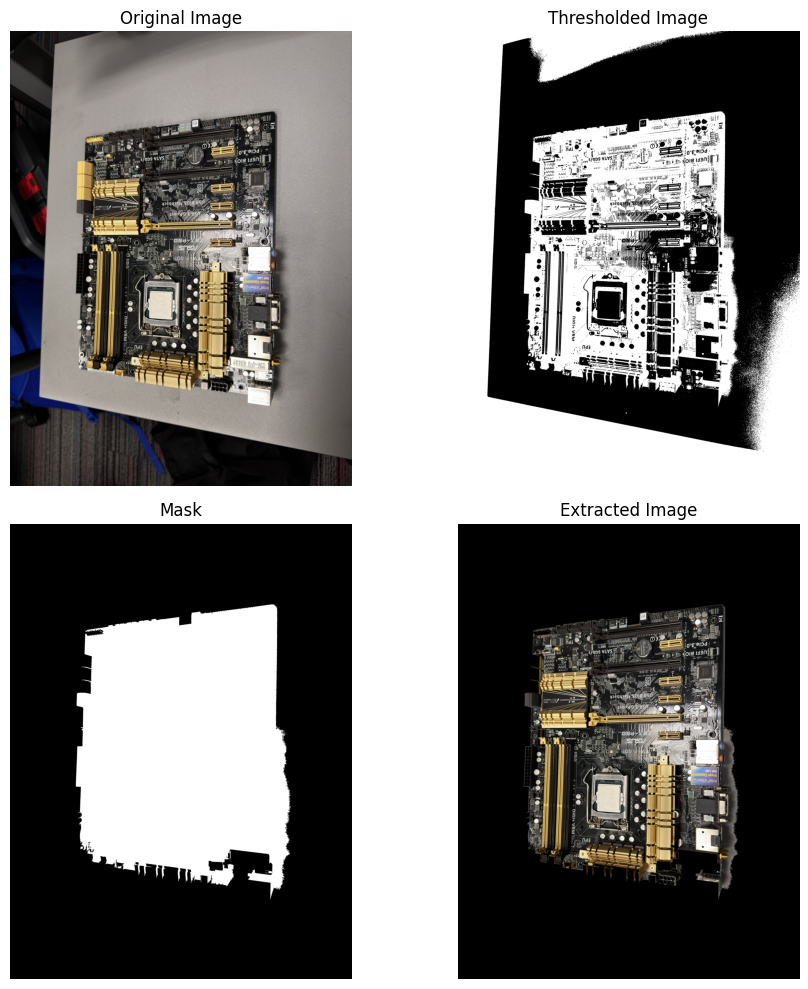

Final Summary:
Original Image Shape: (5792, 4344, 3)
Extracted Image Shape: (5792, 4344, 3)
Mask Dimensions: (5792, 4344)
Number of Contours Found: 4536


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  # For displaying images in Colab or non-GUI environments
import os
from datetime import datetime

# Function to generate unique filenames
def generate_unique_filename(base_name, extension="jpeg"):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    return f"{base_name}_{timestamp}.{extension}"

# Define output directory for saving images
output_dir = '/content/drive/MyDrive/Project3Data/step1/'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Path to your motherboard image (adjust as needed)
image_path = '/content/drive/MyDrive/Project3Data/motherboard_image.JPEG'

# Read the image
img = cv2.imread(image_path)
if img is None:
    print("Error: Could not read the image. Check the image_path.")
else:
    print("Step 1: Original image loaded successfully.")

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian Blur to smooth the image and reduce noise
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    print("Step 2: Image converted to grayscale and blurred.")

    # Save the grayscale image
    gray_filename = generate_unique_filename("grayscale_image", "jpeg")
    cv2.imwrite(os.path.join(output_dir, gray_filename), gray)
    print(f"Grayscale image saved as: {gray_filename}")

    # Apply threshold (adjust threshold value as needed)
    _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
    print("Step 3: Threshold applied to separate PCB from background.")

    # Save the thresholded image
    thresh_filename = generate_unique_filename("thresholded_image", "jpeg")
    cv2.imwrite(os.path.join(output_dir, thresh_filename), thresh)
    print(f"Thresholded image saved as: {thresh_filename}")

    min_contour_area = 500  # Adjust based on your image
    filtered_contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        print("No contours found. Try adjusting the threshold or preprocessing steps.")
    else:
        print(f"Step 4: {len(contours)} contours found. Selecting the largest one.")
        # Find the largest contour assuming the PCB is the largest object
        largest_contour = max(contours, key=cv2.contourArea)

        # Create a mask based on the largest contour
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [largest_contour], -1, 255, -1)
        print("Step 5: Mask created based on the largest contour.")

        # Save the mask image
        mask_filename = generate_unique_filename("mask_image", "jpeg")
        cv2.imwrite(os.path.join(output_dir, mask_filename), mask)
        print(f"Mask image saved as: {mask_filename}")

        # Extract the PCB using bitwise_and
        mask_3ch = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
        extracted = cv2.bitwise_and(img, mask_3ch)
        print("Step 6: PCB extracted using the mask.")

        # Save the extracted image
        extracted_filename = generate_unique_filename("extracted_image", "jpeg")
        cv2.imwrite(os.path.join(output_dir, extracted_filename), extracted)
        print(f"Extracted image saved as: {extracted_filename}")

        # Display results
        fig, axs = plt.subplots(2, 2, figsize=(10, 10))
        axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[0, 0].set_title("Original Image")
        axs[0, 0].axis("off")

        axs[0, 1].imshow(thresh, cmap="gray")
        axs[0, 1].set_title("Thresholded Image")
        axs[0, 1].axis("off")

        axs[1, 0].imshow(mask, cmap="gray")
        axs[1, 0].set_title("Mask")
        axs[1, 0].axis("off")

        axs[1, 1].imshow(cv2.cvtColor(extracted, cv2.COLOR_BGR2RGB))
        axs[1, 1].set_title("Extracted Image")
        axs[1, 1].axis("off")

        plt.tight_layout()
        plt.show()

        # Print final result summary
        print("Final Summary:")
        print(f"Original Image Shape: {img.shape}")
        print(f"Extracted Image Shape: {extracted.shape}")
        print(f"Mask Dimensions: {mask.shape}")
        print(f"Number of Contours Found: {len(contours)}")
